## Twitter Sentiment Analysis

The datasets were downloaded from https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('twitter_training.csv', header=None)
val_df = pd.read_csv('twitter_validation.csv', header=None)
train_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
train_df.columns=['id', 'info', 'sentiment', 'text']
val_df.columns=['id', 'info', 'sentiment', 'text']

In [4]:
train_df.head()

,id,info,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
val_df.head()

,id,info,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_df.isnull().max().sum()

1

In [7]:
val_df.isnull().max().sum()

0

In [8]:
null_texts = train_df.query('text != text')
len(null_texts)

686

In [9]:
train_df.dropna(inplace=True)
print("Length of dataset after dropping rows with a null text value =", len(train_df))

Length of dataset after dropping rows with a null text value = 73996


### Text Pre-processing

In [10]:
import re
# Lowercase all characters in text
train_df['text'] = train_df['text'].str.lower()
# Convert all text values to strings
train_df['text'] = [str(data) for data in train_df.text]
# Regex to handle special characters
train_df['text'] = train_df.text.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
train_df.head()

,id,info,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
# Lowercase all characters in text
val_df['text'] = val_df['text'].str.lower()
# Convert all text values to strings
val_df['text'] = [str(data) for data in val_df.text]
# Regex to handle special characters
val_df['text'] = val_df.text.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
val_df.head()

,id,info,sentiment,text
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,now the president is slapping americans in the...


In [12]:
print("There are", train_df['info'].nunique(), "unique values in the info column")

There are 32 unique values in the info column


Text(0.5, 1.0, 'Sentiment Distribution')

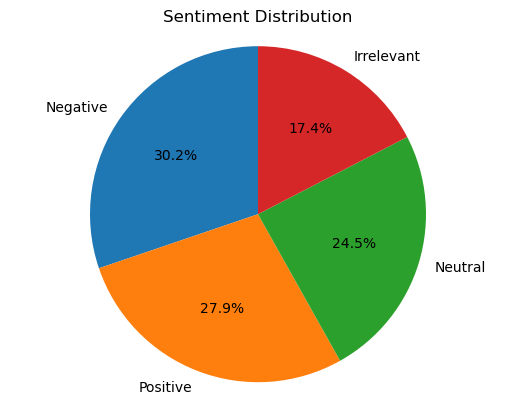

In [13]:
sentiment_counts = train_df['sentiment'].value_counts()
labels = sentiment_counts.index.tolist()
sizes = sentiment_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
ax.set_title("Sentiment Distribution")

In [14]:
train_df['text_length'] = train_df.text.apply(len)
train_df.head()

,id,info,sentiment,text,text_length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


Text(0.5, 0, 'Text Length')

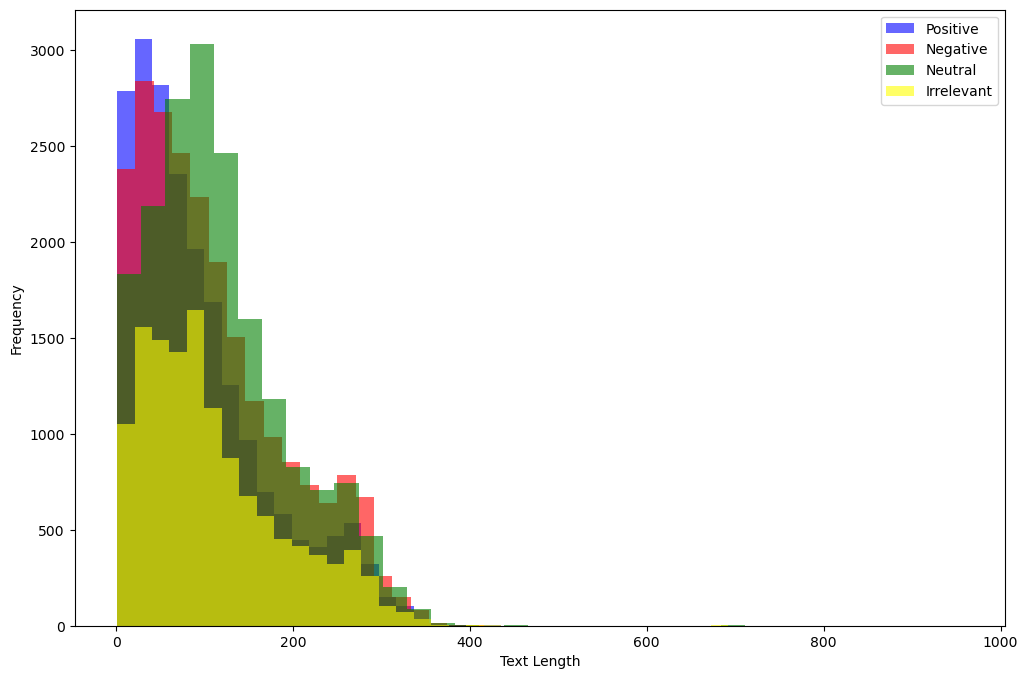

In [15]:
plt.figure(figsize=(12, 8))

train_df[train_df.sentiment=='Positive'].text_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Positive', alpha=0.6)
train_df[train_df.sentiment=='Negative'].text_length.plot(bins=35, kind='hist', color='red', 
                                       label='Negative', alpha=0.6)
train_df[train_df.sentiment=='Neutral'].text_length.plot(bins=35, kind='hist', color='green', 
                                       label='Neutral', alpha=0.6)
train_df[train_df.sentiment=='Irrelevant'].text_length.plot(bins=35, kind='hist', color='yellow', 
                                       label='Irrelevant', alpha=0.6)
plt.legend()
plt.xlabel("Text Length")

### Word Cloud Visualisation of Sentiment Texts
The larger the word, the more frequent it is in that sentiment's texts. We can see that there are common words that are frequent between the four sentiments such as "game". 

In [16]:
from wordcloud import WordCloud

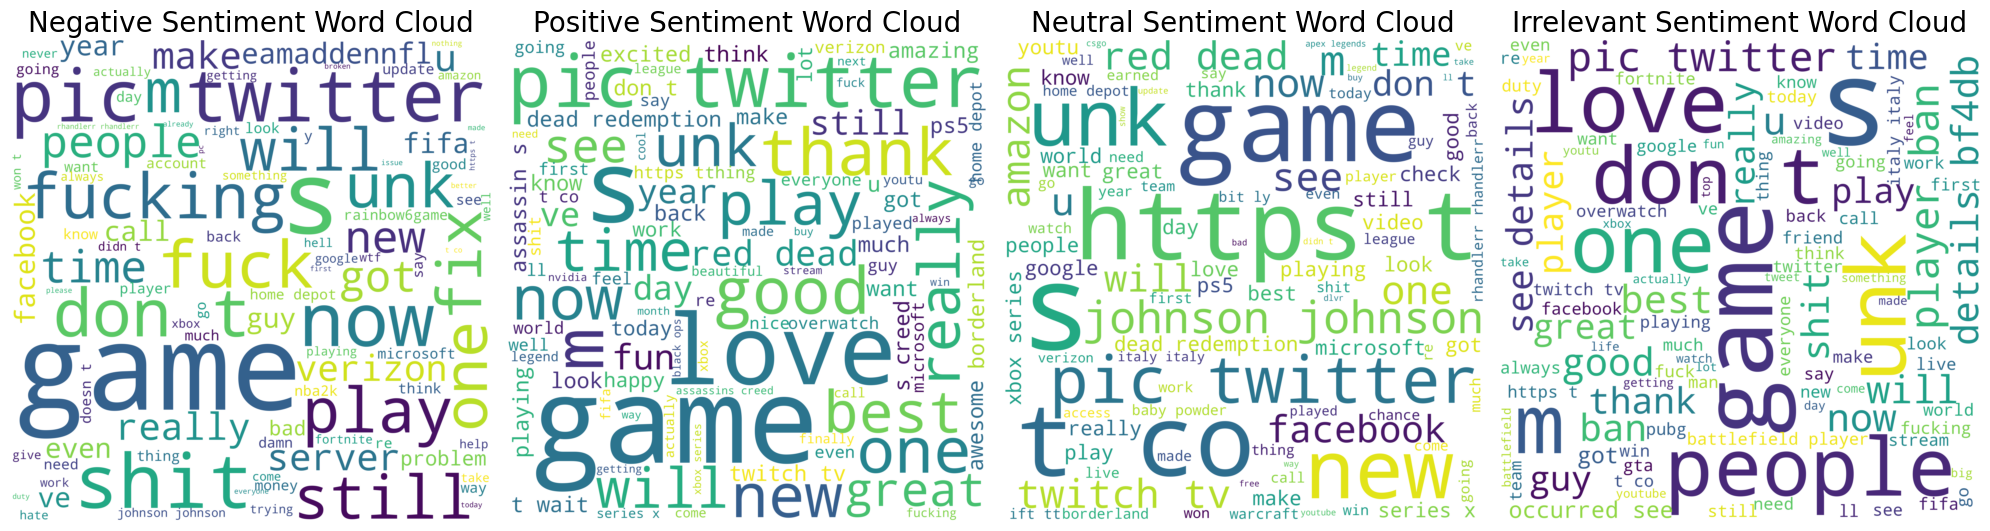

In [17]:
# Set up subplots: 1 row, 4 columns for 4 sentiments
fig, axes = plt.subplots(1, 4, figsize=(20,10))

# Generate and plot word clouds for each sentiment category
for i, sentiment in enumerate(labels):
    # Filter the text for the current sentiment
    word_cloud_text = ' '.join(train_df[train_df["sentiment"] == sentiment].text)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="white",
        scale=10,
        width=400,
        height=400
    ).generate(word_cloud_text)
    
    # Display the word cloud on the appropriate subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f'{sentiment} Sentiment Word Cloud', fontsize=20)
    axes[i].axis("off")  # Hide axes

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

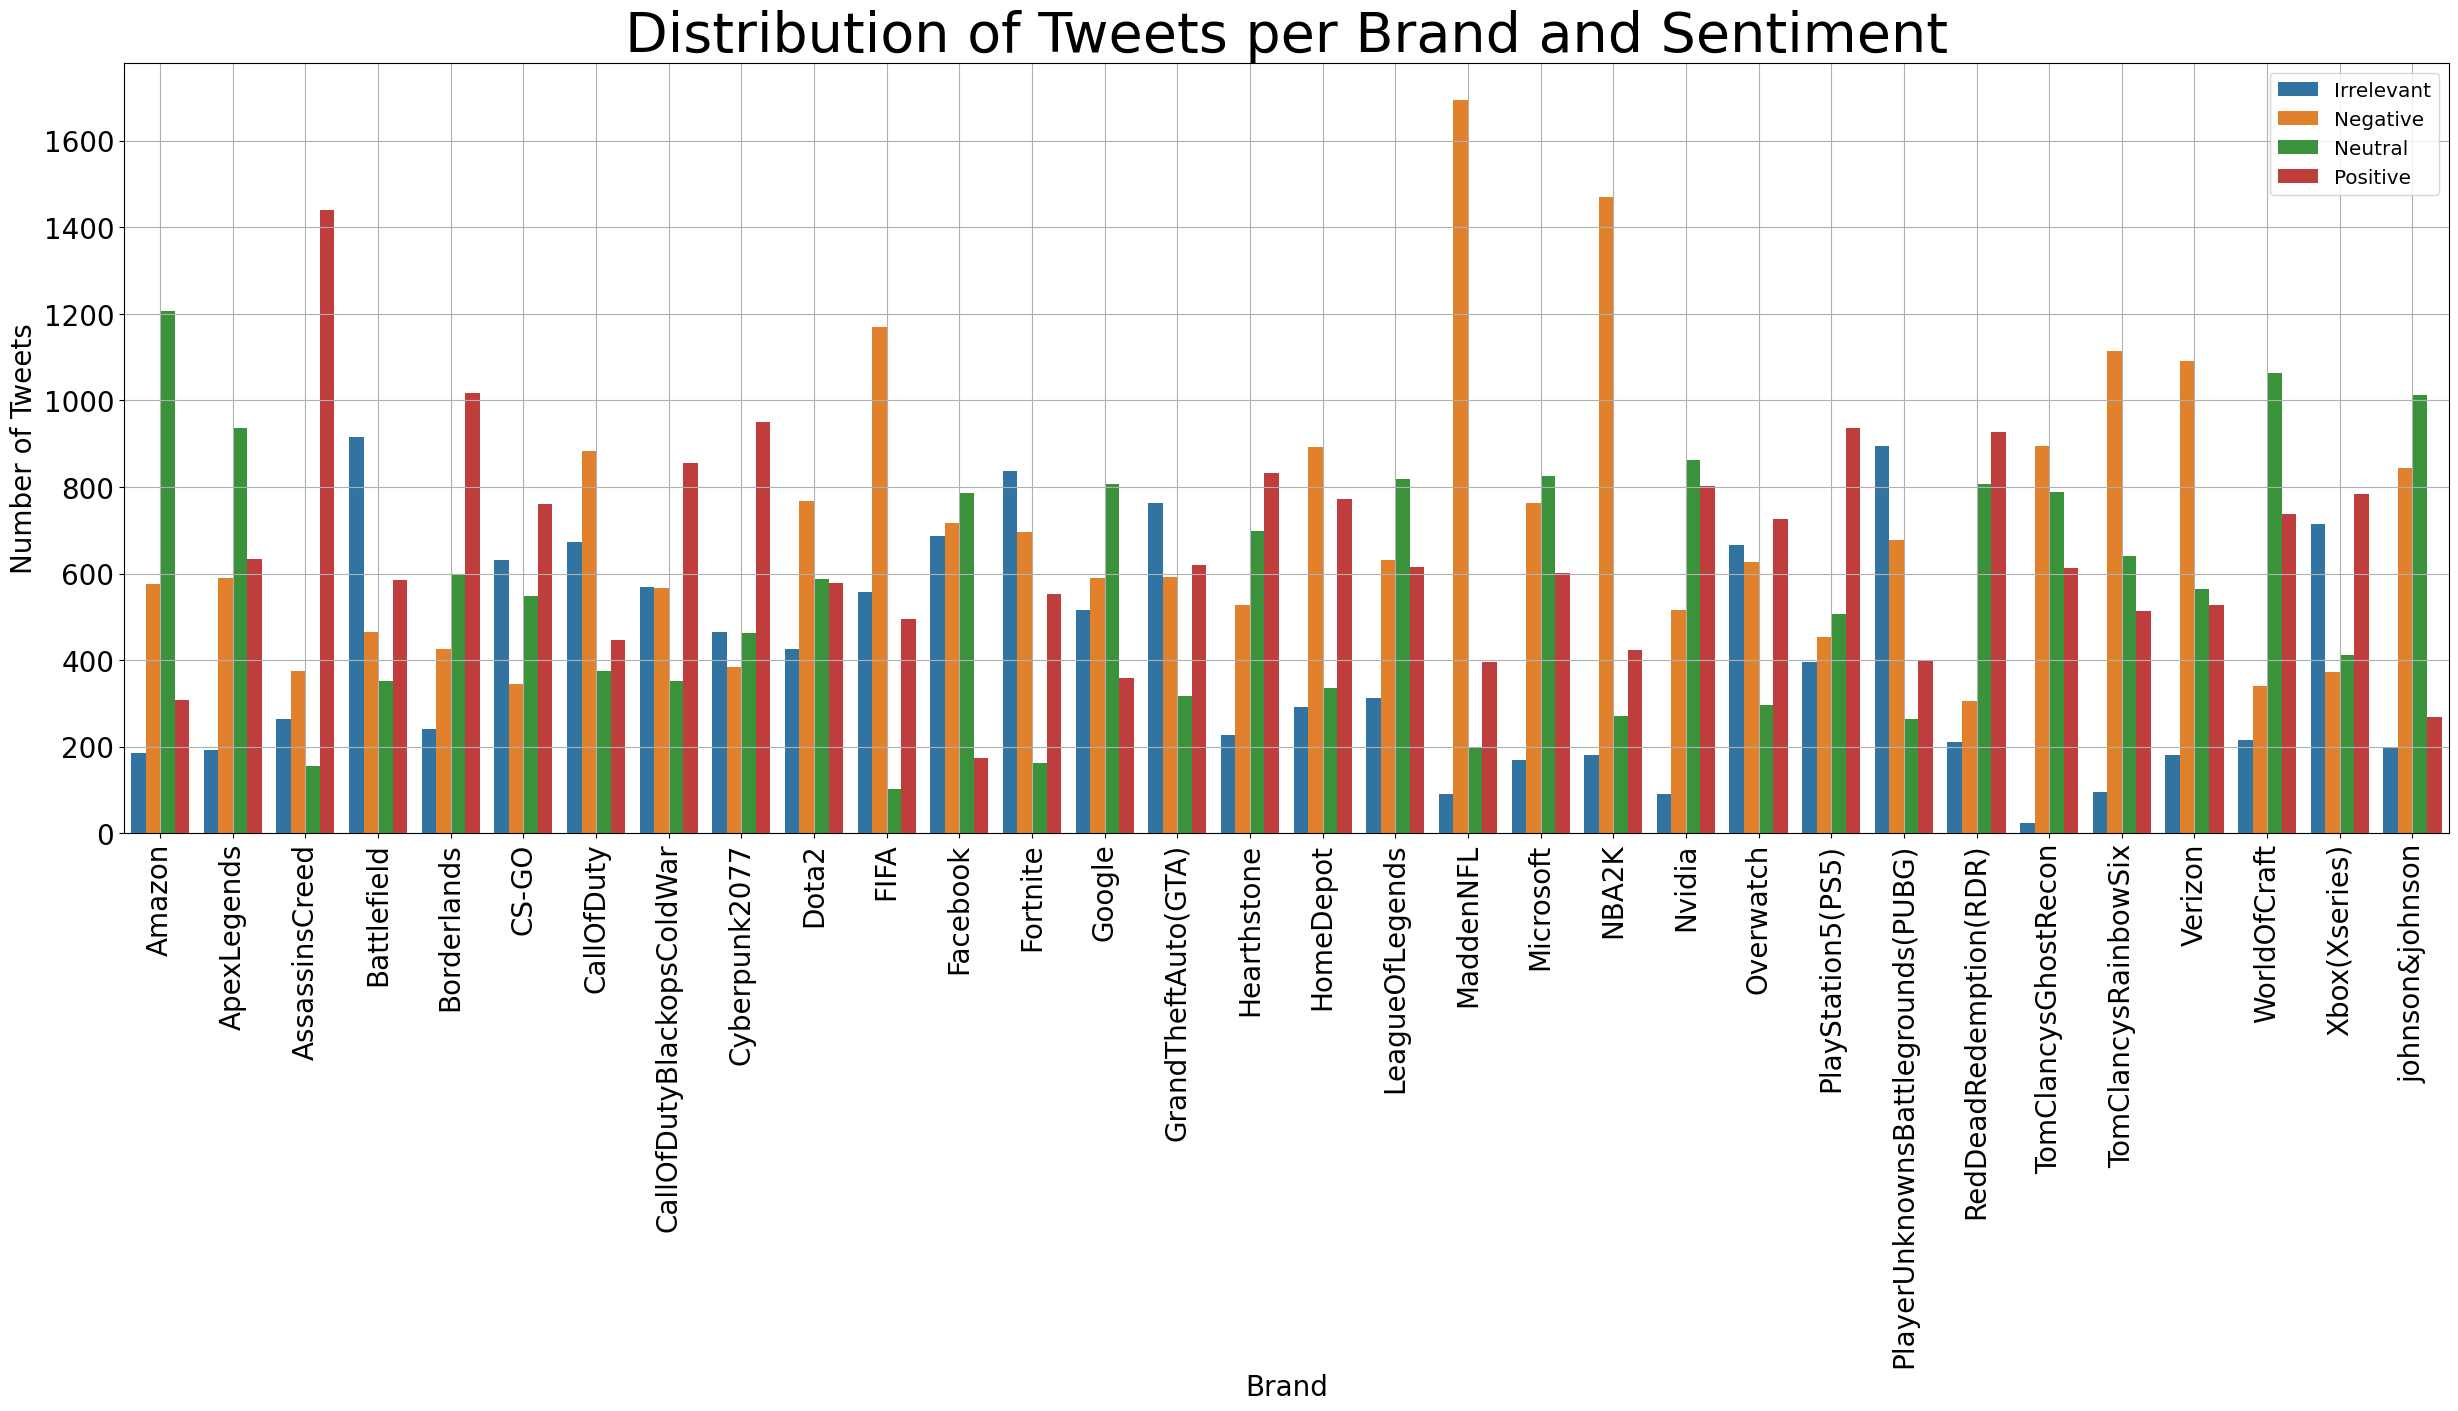

In [18]:
category_sentiment_plot = train_df.groupby(by=['info', 'sentiment']).count().reset_index()

plt.figure(figsize=(30,10))
sns.barplot(data=category_sentiment_plot, x='info', y='id', hue='sentiment')
plt.xticks(rotation=90, fontsize=20)
plt.xlabel("Brand", fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Number of Tweets", fontsize=20)
plt.grid()
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title("Distribution of Tweets per Brand and Sentiment", fontsize=40)
plt.show()

### Text Vectorisation
Where a given word is a token, let's count the number of unique tokens, in other words, words.

In [19]:
import nltk
from nltk import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')

In [20]:
tokens = [word_tokenize(str(word)) for word in train_df.text]
tokens_counter = [item for sublist in tokens for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


In [21]:
# Example

print(tokens[2])

['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all']


In [22]:
# English stopwords

stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

Now, we need to convert this list of tokens into a vector. To do this, we will use the bag-of-words model:
- Count occurrence of a word in a token (term frequency)
- Weigh the occurences, so that frequent tokens get lower weight (inverse document frequency)
- Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vect = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) # Analysis of one word
)

In [24]:
from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train_bow = bow_vect.fit_transform(X_train)
X_test_bow = bow_vect.transform(X_test)

In [26]:
print(type(X_train_bow), X_train_bow.shape)
print(type(X_test_bow), X_test_bow.shape)

<class 'scipy.sparse._csr.csr_matrix'> (59196, 28977)
<class 'scipy.sparse._csr.csr_matrix'> (14800, 28977)


Occurrence count is a good start but there is an issue. Longer texts will have higher average count values than shorter documents, even though they might be talking about the same topics. Therefore, to avoid these discrepancies, we divide the number of occurrences of each word in a text by the total number of words in the text. These new features are called tf for Term Frequencies

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
# class sklearn.feature_extraction.text.TfidfTransformer(*, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

tfidf_transformer = TfidfTransformer().fit(X_train_bow)
tfidf_transformer.transform(X_train_bow)

### Logistic Regression
Now, let's train a basic logistic regression classifier on the training dataset, using k-fold cross validation. 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X_train_bow, y_train)
log_reg_score = cross_val_score(log_reg, X_train_bow, y_train, cv=5)
print("Logistic regression has a training score of", round(log_reg_score.mean(), 3))

Logistic regression has a training score of 0.822


Let's use GridSearchCV to find the best hyperparameters improve the CV score.

In [29]:
from sklearn.model_selection import GridSearchCV

log_reg_grid = {"penalty": ['l1', 'l2'], 'C': np.logspace(-3,3,7)}
log_reg_search = GridSearchCV(LogisticRegression(), log_reg_grid)
log_reg_search.fit(X_train_bow, y_train)
log_reg = log_reg_search.best_estimator_

In [30]:
log_reg_score = cross_val_score(log_reg, X_train_bow, y_train, cv=5)
print("The optimised logistic regression has a training score of", round(log_reg_score.mean(), 3))

The optimised logistic regression has a training score of 0.83


In [31]:
log_reg_search.best_params_

{'C': 10.0, 'penalty': 'l2'}

Let's test this model on the validation dataset

In [32]:
X_val_bow = bow_vect.transform(val_df.text)
y_val = val_df.sentiment

In [33]:
from sklearn.metrics import accuracy_score

val_result = log_reg.predict(X_val_bow)
print("Accuracy =", accuracy_score(y_val, val_result))

Accuracy = 0.945


Let's try to optimise our CountVectorizer ngram_range parameter. Due to lack of computational power, we're not able to perform a RandomizedSearchCV to find the best parameters. 

In [34]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import RandomizedSearchCV

# p = Pipeline([('vect', CountVectorizer(tokenizer=word_tokenize,
#                          stop_words=stop_words)),
#               ('transformer', TfidfTransformer()),
#           ('clf', LogisticRegression(penalty='l2'))])
# log_reg_search = RandomizedSearchCV(p, 
#         param_distributions={
#               'vect__ngram_range':  [(1,1), (1,2), (1,4)],
#               'clf__C': np.logspace(-3,3,7)}, n_iter=5, cv=3, n_jobs=-1)
# log_reg_search.fit(X_train, y_train)
# log_reg = log_reg_search.best_estimator_

Therefore, let's try an n-gram of 4 words. In order to reduce computational expense, we have set min_df to 0.01, which will ignore the bows that appear less than 1% in all the texts. However, doing this achieves a poor accuracy score on both the training and validation sets.

In [46]:
bow_vect = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1,2),
    min_df=0.01
)

X_train_bow = bow_vect.fit_transform(X_train)
X_test_bow = bow_vect.transform(X_test)
X_val_bow = bow_vect.transform(val_df.text)

In [47]:
log_reg = LogisticRegression(C=10, penalty='l2', max_iter=1500)
log_reg.fit(X_train_bow, y_train)

LogisticRegression(C=10, max_iter=1500)

In [48]:
log_reg_score = cross_val_score(log_reg, X_train_bow, y_train, cv=5)
print(log_reg_score)

[0.49907095 0.49691697 0.50308303 0.49750824 0.5029141 ]


In [49]:
val_result = log_reg.predict(X_val_bow)
print("Accuracy =", accuracy_score(y_val, val_result))

Accuracy = 0.543


### XGBoost 

Let's try a different classifier. XGBoost is an optimised distributed gradient boosting library designed to be highly efficient, flexible and portable.

It implements ML algorithms under the gradient boosting framework which is a type of ML boosting which relies on the intuition that the best possible next model, when combined with previous models, minimises the overall prediction error. The key idea is to set the target outcomes for the next model in order to minimise the error.

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train)
y_test_bow_num = le.transform(y_test)
y_val_bow_num = le.transform(y_val)

In [40]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train_bow, y_train_bow_num)
xgb_pred = XGB.predict(X_test_bow)
print("Accuracy =", accuracy_score(y_test_bow_num, xgb_pred))

Accuracy = 0.5716216216216217


In [41]:
XGB = XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)
XGB.fit(X_train_bow, y_train_bow_num)
xgb_pred = XGB.predict(X_test_bow)
print("Accuracy =", accuracy_score(y_test_bow_num, xgb_pred))

Accuracy = 0.6917567567567567


In [42]:
xgb_val_pred = XGB.predict(X_val_bow)
print("Accuracy =", accuracy_score(y_val_bow_num, xgb_val_pred))

Accuracy = 0.793


### Improvements

From above, the XGBoost model does not quite perform well either. The next steps would be to perform a GridSearchCV to tune the hyperparameters of the XGBoost model. However, due to computational constraints, we are not able to do so.

Furthermore, perhaps using different vectorizers such as TfidVectorizer insttead of CountVectorizer, which reduces the impact of common words and may improve the model's ability to generalise